In [39]:
import pandas as pd
df = pd.read_csv('C:/BAFproject202502/final_data_1102.csv')
print(df.head())

   Unnamed: 0  individual_id  curr_ann_amt  days_tenure date_of_birth  \
0           0   2.213000e+11    818.877997       1454.0    1978-06-23   
1           1   2.213001e+11    974.199182       1795.0    1950-05-30   
2           2   2.213007e+11    967.375112       4818.0    1967-07-07   
3           3   2.213016e+11    992.409561        130.0    1969-05-25   
4           4   2.213016e+11    784.633494       5896.0    1972-09-25   

     income  has_children  length_of_residence home_market_value  \
0   22500.0             1                 15.0     50000 - 74999   
1   27500.0             0                  2.0     50000 - 74999   
2   42500.0             0                 10.0     75000 - 99999   
3  125000.0             1                  6.0   175000 - 199999   
4   87500.0             1                  4.0   225000 - 249999   

   age_in_years  ...  dgs10_at_orig  cpi_at_orig  unrate_at_orig  \
0            44  ...       2.832632      252.767             3.9   
1            72 

In [40]:
df

,Unnamed: 0,individual_id,curr_ann_amt,days_tenure,date_of_birth,income,has_children,length_of_residence,home_market_value,age_in_years,...,dgs10_at_orig,cpi_at_orig,unrate_at_orig,sp500_at_orig,tax_benefit_status,surrender_penalty_rate,breakeven_reached,contact_frequency,payment_delay_history,contact_group
0,0,2.213000e+11,818.877997,1454.0,1978-06-23,22500.0,1,15.0,50000 - 74999,44,...,2.832632,252.767,3.9,2567.307386,not_qualified,0.40,0,3,0,3-4회
1,1,2.213001e+11,974.199182,1795.0,1950-05-30,27500.0,0,2.0,50000 - 74999,72,...,2.583810,248.859,4.0,2789.803816,not_qualified,0.20,0,1,0,0-2회
2,2,2.213007e+11,967.375112,4818.0,1967-07-07,42500.0,0,10.0,75000 - 99999,55,...,3.401905,215.861,9.8,1044.552383,qualified,0.00,1,2,0,0-2회
3,3,2.213016e+11,992.409561,130.0,1969-05-25,125000.0,1,6.0,175000 - 199999,53,...,2.896000,294.940,3.5,3911.729492,not_qualified,0.95,0,6,0,5-6회
4,4,2.213016e+11,784.633494,5896.0,1972-09-25,87500.0,1,4.0,225000 - 249999,50,...,4.729048,201.900,4.4,1363.377264,qualified,0.00,1,1,0,0-2회
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641987,1641987,2.213007e+11,1259.900413,803.0,1967-07-07,27500.0,1,3.0,50000 - 74999,55,...,0.679524,259.997,7.8,3365.516671,not_qualified,0.60,0,2,0,0-2회
1641988,1641988,2.213015e+11,604.096865,3261.0,1945-07-01,87500.0,0,1.0,125000 - 149999,77,...,2.901905,234.719,6.7,1807.775234,near_qualified,0.00,1,2,0,0-2회
1641989,1641989,2.213026e+11,1255.570597,3403.0,1981-09-22,125000.0,0,12.0,125000 - 149999,41,...,2.737273,233.456,7.2,1670.093639,near_qualified,0.00,1,3,0,3-4회
1641990,1641990,2.213008e+11,1104.105051,1258.0,1970-07-26,87500.0,1,11.0,75000 - 99999,52,...,2.074000,255.213,3.6,2890.165979,not_qualified,0.40,0,2,0,0-2회


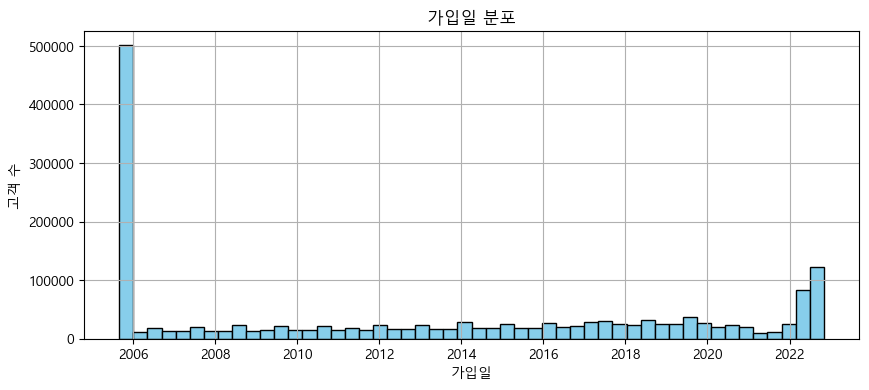

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

df['cust_orig_month'] = pd.to_datetime(df['cust_orig_month'])

plt.figure(figsize=(10,4))
plt.hist(df['cust_orig_month'], bins=50, color='skyblue', edgecolor='k')
plt.title('가입일 분포')
plt.xlabel('가입일')
plt.ylabel('고객 수')
plt.grid(True)
plt.show()

In [42]:
# 불필요한 열 제거
cols_to_drop = [
    'Unnamed: 0', 'individual_id'
    ]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 1. 단기 해지 예측 모델 (0~2년)
## XGBoost
0~2년은 통계적으로 초기이탈률로 볼 수 있음

In [43]:
from sklearn.model_selection import train_test_split

# Phase1 Target 정의 (2년 이내 해지 고객)
df['churn_2yr'] = ((df['days_tenure'] <= 730) & (df['churn'] == 1)).astype(int)

# X, y 분리
target = 'churn_2yr'
y = df[target]
X = df.drop(columns=[target, 'churn'])  # 기존 churn 제거

# 7:1.5:1.5 stratified split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape, "Valid:", X_valid.shape, "Test:", X_test.shape)
print("Churn_2yr 비율 → Train:", y_train.mean(), "Valid:", y_valid.mean(), "Test:", y_test.mean())


Train: (1149394, 34) Valid: (246299, 34) Test: (246299, 34)
Churn_2yr 비율 → Train: 0.056541099048716105 Valid: 0.05654103345933195 Test: 0.05654103345933195


In [44]:
#데이터 분할
from sklearn.model_selection import train_test_split

# 타깃 변수 지정
target = 'churn'  # 종속변수 이름
y = df[target]
X = df.drop(columns=[target])

# Train (70%) vs Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,            # 나머지 30%는 valid+test
    stratify=y,               # churn 비율 유지
    random_state=42           # 재현성 확보
)

# Validation (15%) vs Test (15%)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,            # temp(30%)을 반반 나눔 → 각각 15%
    stratify=y_temp,
    random_state=42
)

## 누수 변수 및 변수적합성 확인

In [45]:
import re
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

# 0) 준비
def safe_auc(y, x):
    try:
        x = pd.Series(x)
        if x.nunique() <= 2:  # 거의 이진인 경우도 허용
                              # tie가 많아도 auc 계산 가능
            pass
        # 결측 제거 정렬
        m = (~pd.isna(x)) & (~pd.isna(y))
        if m.sum() < 100:  # 표본 너무 적으면 스킵
            return np.nan
        return roc_auc_score(y[m], x[m])
    except Exception:
        return np.nan

# 타깃 정의에 직접/간접 사용됐을 가능성 높은 컬럼들
direct_leak_candidates = [
    'days_tenure','churn','churn_ref_month','cust_orig_date','cust_orig_month',
    'churn_date','cancel_date','status_change_date','termination_date'
]

# 미래/관찰 시점 고정값 패턴
future_patterns = [
    r'_2022_11$',  
    r'_20\d{2}_\d{2}$'  
]


# 1) 누수 의심 컬럼 확인
def find_present(cols, candidates):
    return [c for c in candidates if c in cols]

X_cols = set(X_train.columns)

present_direct_leaks = find_present(X_cols, direct_leak_candidates)

present_future_like = []
for c in X_cols:
    if any(re.search(p, c) for p in future_patterns):
        present_future_like.append(c)

print("[누수 의심 변수] X에 포함된 컬럼:", present_direct_leaks or "없음")
print("[미래/관찰시점 패턴] X에 포함된 컬럼 예시 10개:",
      present_future_like[:10] if present_future_like else "없음")

# 2) AUC 확인
num_cols = list(pd.DataFrame(X_train).select_dtypes(include='number').columns)
single_auc = []
for c in num_cols:
    auc_c = safe_auc(y_train, X_train[c])
    single_auc.append((c, auc_c))
single_auc = pd.DataFrame(single_auc, columns=['feature','train_auc']).sort_values('train_auc', ascending=False)

print("\n 단일변수 기준 Train AUC 상위 15")
print(single_auc.head(15))

# 0.99 이상이면 사실상 누수/완전분리 후보
high_auc = single_auc[single_auc['train_auc'] >= 0.99]
if not high_auc.empty:
    print("\n 단일 변수만으로 AUC≥0.99인 변수들 (누수/완전분리 의심)")
    print(high_auc)

# 3) 분할 간 중복 고객 존재 여부(데이터 누수)
if 'individual_id' in df.columns:
    # 각 split에 해당하는 id 집합을 추정 (인덱스가 원본 df 인덱스를 유지한다고 가정하기 어려우므로,
    # X/y에 id가 포함되어 있지 않다면 아래처럼 df에서 마스킹)
    # 방법 1: X에 individual_id가 포함되어 있으면 더 정확
    if 'individual_id' in X_train.columns:
        s_train = set(X_train['individual_id'])
        s_valid = set(X_valid['individual_id'])
        s_test  = set(X_test['individual_id'])
    else:
        # 대안: split 시점에 인덱스를 보존했다면 X의 index를 사용해 df에서 id 추출
        try:
            s_train = set(df.loc[X_train.index, 'individual_id'])
            s_valid = set(df.loc[X_valid.index, 'individual_id'])
            s_test  = set(df.loc[X_test.index,  'individual_id'])
        except Exception:
            s_train = s_valid = s_test = set()

    dup_tv  = s_train.intersection(s_valid)
    dup_tt  = s_train.intersection(s_test)
    dup_vt  = s_valid.intersection(s_test)

    print("\n 중복 고객 교차 여부")
    print(f"- Train ∩ Valid: {len(dup_tv)}")
    print(f"- Train ∩ Test : {len(dup_tt)}")
    print(f"- Valid ∩ Test : {len(dup_vt)}")
    if len(dup_tv)+len(dup_tt)+len(dup_vt) > 0:
        print("누수 가능성")


# 4) stratify가 잘 적용됐는지(양성 비율 점검)
def rate(s): return float(pd.Series(s).mean())
print("\n 양성비 점검")
print(f"- Train: {rate(y_train):.4f}")
print(f"- Valid: {rate(y_valid):.4f}")
print(f"- Test : {rate(y_test):.4f}")

# 5) days_tenure 임계값 점검
if 'days_tenure' in X_train.columns:
    auc_dt = safe_auc(y_train, -np.abs(X_train['days_tenure']-730))  # 730 기준과의 거리
    print(f"\n days_tenure 기준 분리 점검 → Train AUC = {auc_dt:.4f}")

    # 만약 days_tenure가 있다면 즉시 제거 권고
    if 'days_tenure' in present_direct_leaks:
        print("X에서 제거 필요")


[누수 의심 변수] X에 포함된 컬럼: ['days_tenure', 'cust_orig_month']
[미래/관찰시점 패턴] X에 포함된 컬럼 예시 10개: ['unrate_2022_11', 'cpi_2022_11', 'gdp_2022_11', 'sp500_2022_11', 'dgs10_2022_11']

 단일변수 기준 Train AUC 상위 15
                   feature  train_auc
15             cpi_2022_11   1.000000
25       contact_frequency   0.934149
27               churn_2yr   0.745083
20             cpi_at_orig   0.697185
18             gdp_at_orig   0.696821
9           cust_orig_year   0.691478
23  surrender_penalty_rate   0.690497
22           sp500_at_orig   0.680578
11             age_at_orig   0.546461
0             curr_ann_amt   0.516390
3             has_children   0.515798
12       premium_to_income   0.512176
26   payment_delay_history   0.500504
13             gdp_2022_11   0.500000
8              good_credit   0.496140

 단일 변수만으로 AUC≥0.99인 변수들 (누수/완전분리 의심)
        feature  train_auc
15  cpi_2022_11        1.0

 양성비 점검
- Train: 0.1153
- Valid: 0.1153
- Test : 0.1153

 days_tenure 기준 분리 점검 → Train AUC = 0.6425
X에

## 제거할 변수 추가

In [33]:
X_train.columns

Index(['individual_id', 'curr_ann_amt', 'days_tenure', 'date_of_birth',
       'income', 'has_children', 'length_of_residence', 'home_market_value',
       'age_in_years', 'home_owner', 'college_degree', 'good_credit',
       'cust_orig_year', 'cust_orig_month', 'tenure_years', 'age_at_orig',
       'premium_to_income', 'policy_proxy_v2', 'strategy_type_final',
       'gdp_2022_11', 'dgs10_2022_11', 'cpi_2022_11', 'unrate_2022_11',
       'sp500_2022_11', 'gdp_at_orig', 'dgs10_at_orig', 'cpi_at_orig',
       'unrate_at_orig', 'sp500_at_orig', 'tax_benefit_status',
       'surrender_penalty_rate', 'breakeven_reached', 'contact_frequency',
       'payment_delay_history', 'contact_group', 'churn_2yr'],
      dtype='object')

In [54]:
#누수 변수 목록 정의
leak_cols = [
    'days_tenure', 
    'cust_orig_month', 
    'churn_2yr',  
    'gdp_2022_11', 
    'sp500_2022_11', 
    'cpi_2022_11', 
    'dgs10_2022_11', 
    'unrate_2022_11',
    'contact_frequency',
    'cust_orig_year',
    'payment_delay_history',
    'surrender_penalty_rate',
    'breakeven_reached'
]


# 실제로 존재하는 컬럼만 제거
leak_cols = [c for c in leak_cols if c in X_train.columns]
print(f"제거할 누수 변수 {len(leak_cols)}개:", leak_cols)

# 누수 변수 제거
X_train_clean = X_train.drop(columns=leak_cols, errors='ignore')
X_valid_clean = X_valid.drop(columns=leak_cols, errors='ignore')
X_test_clean  = X_test.drop(columns=leak_cols, errors='ignore')

# 재학습
non_numeric_cols = X_train_clean.select_dtypes(exclude=['number']).columns
X_train_num = X_train_clean.drop(columns=non_numeric_cols, errors='ignore')
X_valid_num = X_valid_clean.drop(columns=non_numeric_cols, errors='ignore')
X_test_num  = X_test_clean.drop(columns=non_numeric_cols, errors='ignore')

제거할 누수 변수 13개: ['days_tenure', 'cust_orig_month', 'churn_2yr', 'gdp_2022_11', 'sp500_2022_11', 'cpi_2022_11', 'dgs10_2022_11', 'unrate_2022_11', 'contact_frequency', 'cust_orig_year', 'payment_delay_history', 'surrender_penalty_rate', 'breakeven_reached']


In [55]:
import numpy as np
import pandas as pd

# 안전하게 동작하도록: 없으면 건너뜀
PAIR_CANDIDATES = [
    ("gdp_orig", "gdp_obs"),
    ("unrate_orig", "unrate_obs"),
    ("cpi_orig", "cpi_obs"),
    ("sp500_orig", "sp500_obs"),
    ("dgs10_orig", "dgs10_obs"),
]

EPS = 1e-8

def _add_change_ratio_features(df: pd.DataFrame, has_tenure=True):
    df = df.copy()
    for orig, obs in PAIR_CANDIDATES:
        if orig in df.columns and obs in df.columns:
            base = orig.replace("_orig","")
            # 단순 변화
            df[f"{base}_change"] = df[obs] - df[orig]
            # 비율(원단위에 강함)
            df[f"{base}_ratio"]  = df[obs] / (df[orig].replace(0, np.nan) + EPS)
            # 로그차(스케일 안정: 특히 sp500, cpi)
            # (음수/0 방지: 음수 가능성이 거의 없는 지표 중심으로 적용)
            if (df[obs] > 0).all() and (df[orig] > 0).all():
                df[f"{base}_logdiff"] = np.log(df[obs] + EPS) - np.log(df[orig] + EPS)
            # 재직기간/관찰기간 보정 변화율
            if has_tenure:
                for tenure_col in ["tenure_months", "months_on_book", "months_since_orig"]:
                    if tenure_col in df.columns:
                        months = df[tenure_col].clip(lower=1)  # 0으로 나눔 방지
                        df[f"{base}_chg_per_yr"] = df[f"{base}_change"] / months * 12.0
                        break
    return df

# 세 분할 모두 동일 변환
X_train_fe = _add_change_ratio_features(X_train_num)
X_valid_fe = _add_change_ratio_features(X_valid_num)
X_test_fe  = _add_change_ratio_features(X_test_num)

print("추가된 특성 수:", X_train_fe.shape[1] - X_train_num.shape[1])


추가된 특성 수: 0


##  모델 학습

scale_pos_weight = 7.67
[0]	train-auc:0.70070	valid-auc:0.69802
[100]	train-auc:0.71623	valid-auc:0.69861
[200]	train-auc:0.72805	valid-auc:0.69893


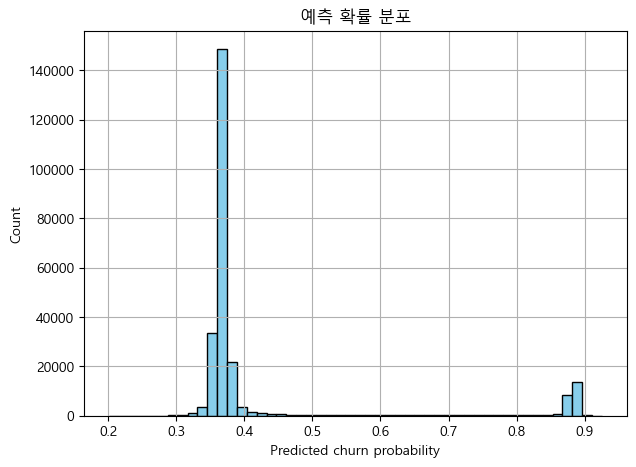

In [56]:
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'


# DMatrix 생성, 전처리된 데이터 사용
dtrain = xgb.DMatrix(X_train_fe, label=y_train)
dvalid = xgb.DMatrix(X_valid_fe, label=y_valid)
dtest  = xgb.DMatrix(X_test_fe,  label=y_test)

# 불균형 비율 계산
pos = y_train.sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / pos
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

# 파라미터 정의 
params = {
    "objective": "binary:logitraw",   
    "eval_metric": "auc",
    "learning_rate": 0.03,
    "max_depth": 6,
    "min_child_weight": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.7,
    "reg_lambda": 1.0,
    "tree_method": "hist",
    "random_state": 42,
    "scale_pos_weight": scale_pos_weight
}

# 모델 학습
evals = [(dtrain, "train"), (dvalid, "valid")]
model = xgb.train(
    params=params,
    dtrain=dtrain,
    evals=evals,
    num_boost_round=2000,
    early_stopping_rounds=150,
    verbose_eval=100
)

# 예측 (로짓 → 시그모이드 변환)
margin_pred = model.predict(dtest)
p_test = 1 / (1 + np.exp(-margin_pred))

# 예측 확률 분포 시각화
plt.figure(figsize=(7,5))
plt.hist(p_test, bins=50, color='skyblue', edgecolor='k')
plt.title('예측 확률 분포')
plt.xlabel('Predicted churn probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## 변수 중요도 평가

In [57]:
# 중요도 추출
importance = model.get_score(importance_type='gain')

# DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Gain': list(importance.values())
}).sort_values(by='Gain', ascending=False)

# 상위 15개 확인
print("상위 15개 변수")
display(importance_df.head(15))

상위 15개 변수


,Feature,Gain
13,cpi_at_orig,6221.585449
8,tenure_years,3239.925049
11,gdp_at_orig,1741.512695
15,sp500_at_orig,392.189209
6,college_degree,174.853058
3,length_of_residence,160.569992
2,has_children,141.961838
12,dgs10_at_orig,63.723232
4,age_in_years,48.187981
1,income,38.555241


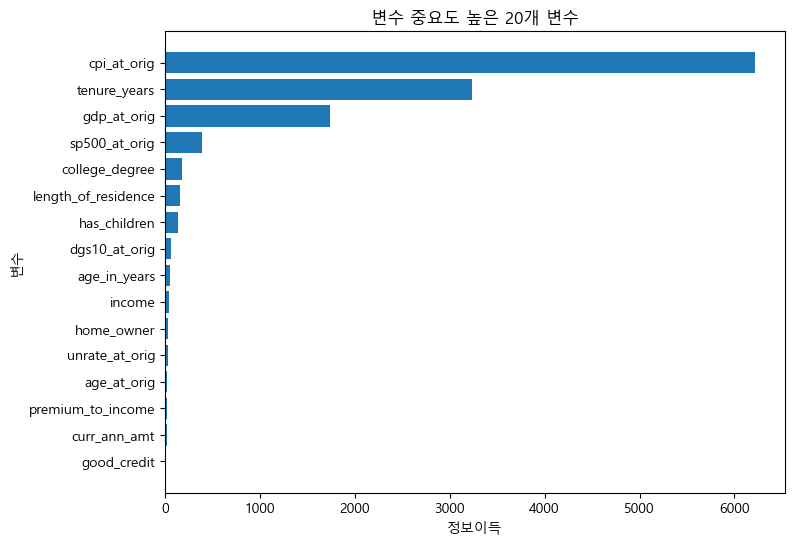

In [58]:
topN = 20  # 상위 20개 보기
plt.figure(figsize=(8,6))
plt.barh(
    importance_df.head(topN)['Feature'][::-1],
    importance_df.head(topN)['Gain'][::-1]
)
plt.xlabel("정보이득")
plt.ylabel("변수")
plt.title("변수 중요도 높은 20개 변수")
plt.show()

## test데이터에 대한 예측확률

In [59]:
import numpy as np

margin_pred = model.predict(dtest)

# 시그모이드 변환으로 확률화
p_test = 1 / (1 + np.exp(-margin_pred))

# 범위 확인
print(p_test.min(), p_test.max())   


0.20067592 0.9252708


C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qkrrl\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4

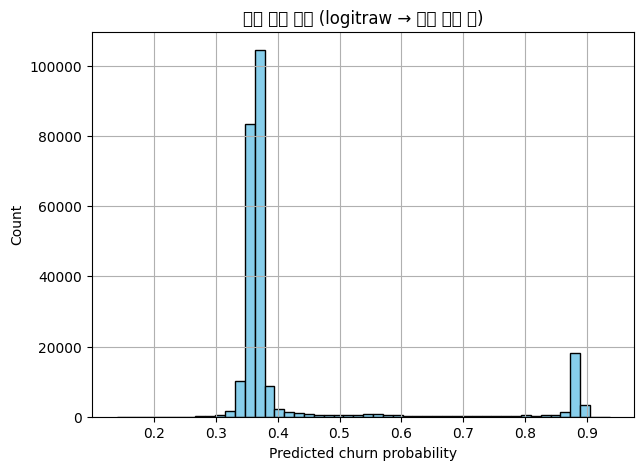

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(p_test, bins=50, color='skyblue', edgecolor='k')
plt.title('예측 확률 분포 (logitraw → 확률 변환 후)')
plt.xlabel('Predicted churn probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [60]:
# 예측 확률이 들어 있는 배열이 p_test라고 가정
import pandas as pd

summary = pd.Series(p_test).describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
print(summary)

count    246299.000000
mean          0.423326
std           0.157174
min           0.200676
1%            0.337533
5%            0.352930
25%           0.362768
50%           0.367272
75%           0.373963
95%           0.882739
99%           0.889158
max           0.925271
dtype: float64


# 2. SHAP

c:\Users\gahee\anaconda3\Lib\site-packages\shap\explainers\_tree.py:253: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(
c:\Users\gahee\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\gahee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


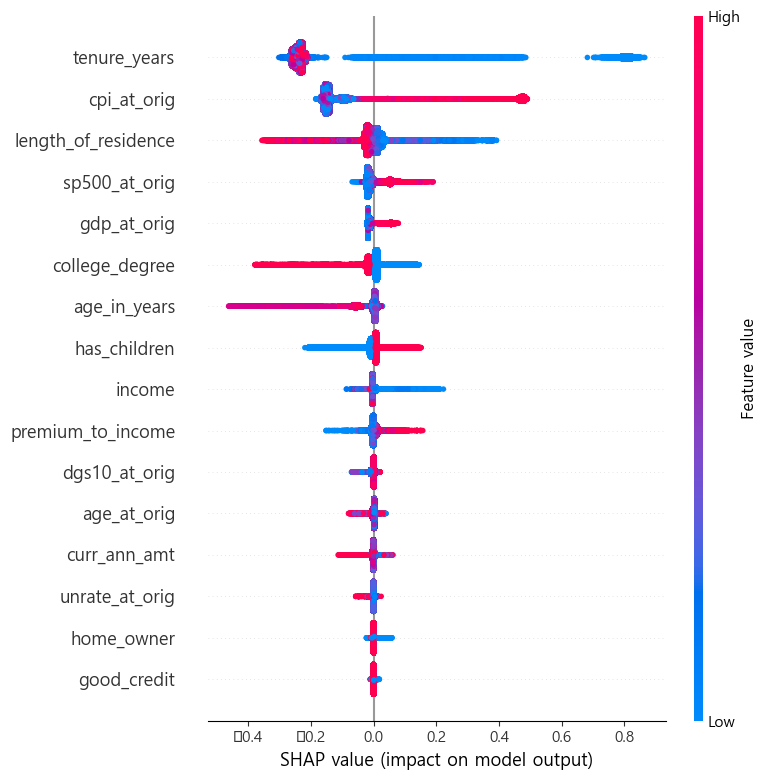

In [36]:
#SHAP 분석
import shap
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_fe)

#시각화
shap.summary_plot(shap_values, X_test_fe)

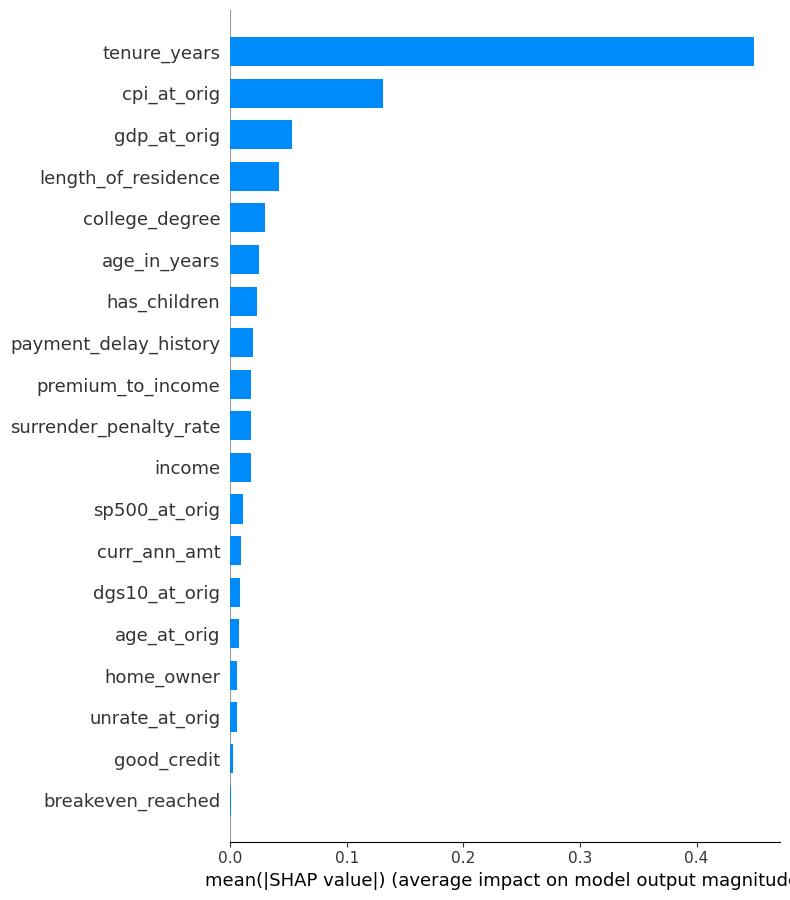

In [ ]:
# Feature importance (변수 중요도)
shap.summary_plot(shap_values, X_test_fe, plot_type="bar") 